In [1]:
# Import libraries
import pandas as pd
import numpy as np
import json
import umap
#import sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn import cluster
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.transforms import Bbox

In [2]:
# Import the matrices of GIANA encoding.
#  This is useless, I have save and load the encoding matrix in "Processed_TRA_By_GIANA", or some files like this.

# Encoding_Matrix_TRA_human = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/VDJdb_TRA_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
# display(Encoding_Matrix_TRA_human)

# Encoding_Matrix_TRB_human = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/VDJdb_TRB_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
# display(Encoding_Matrix_TRB_human)

### Load the processed data.
This part is to load the data processed by GIANA and R file. This file contain CDR3, TRAV, TRAJ, epitope and epitope species.A encoding metrix has been calculated in following columns.  
I try to find the best cluster result, so I have modified the input data for so many times. In the next block, I have comment many code that are different data.

In [3]:
# # This part used to load the processed data as a encoding matrix form.

# # This id the whole TRA chain in origin data set.
# Processed_TRA_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRA_by_GIANA.csv')
# display(Processed_TRA_by_GIANA)

# Processed_TRB_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRB_by_GIANA.csv')
# display(Processed_TRB_by_GIANA)

# This is the TRA, TRB chain from the data's score columns are bigger than 0. And choose the [4:-1] index in the CDR3 sequences
# Processed_TRA_by_GIANA = pd.read_csv('Processed_TRA_Conf_by_GIANA_Ver1.csv')
# display(Processed_TRA_by_GIANA)

# Processed_TRB_by_GIANA = pd.read_csv('Processed_TRB_Conf_by_GIANA_Ver1.csv')
# display(Processed_TRB_by_GIANA)

# # This is the TRA, TRB chain from the data's score columns are bigger than 0.
Processed_TRA_by_GIANA = pd.read_csv('Processed_TRA_Conf_by_GIANA.csv')
# display(Processed_TRA_by_GIANA)

Processed_TRB_by_GIANA = pd.read_csv('Processed_TRB_Conf_by_GIANA.csv')
# display(Processed_TRB_by_GIANA)


Processed_TRA_by_GIANA = pd.read_csv('data/Processed_TRA_Conf_human.csv')
display(Processed_TRA_by_GIANA)

Processed_TRB_by_GIANA = pd.read_csv('data/Processed_TRB_Conf_human.csv')
display(Processed_TRB_by_GIANA)

Processed_Comb_by_GIANA = pd.concat([Processed_TRA_by_GIANA.iloc[:, 8:], Processed_TRB_by_GIANA.iloc[:, 8:]], axis=1)
display(Processed_Comb_by_GIANA)
# Processed_Comb_by_GIANA = pd.read_csv('data/VDJdb_Comb_Conf_human--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t')
# display(Processed_Comb_by_GIANA)
# Processed_TRA_TRB_by_GIANA = pd.read_csv('/content/drive/My Drive/GIANA/GIANA-1.2.0/Processed_TRA_TRB_by_GIANA.csv')
# display(Processed_TRA_TRB_by_GIANA)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V8.1,...,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103
0,CAASIGAGNMLTF,CAASIGAGNMLTF,1,TRAV29/DV5*01,TRAJ39*01,HomoSapiens,NLVPMVATV,0.00%,1,-0.330413,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
1,CAASIGAGNMLTF.1,CAASIGAGNMLTF,1,TRAV29/DV5*01,TRAJ39*01,HomoSapiens,NLVPMVATV,0.00%,1,-0.330413,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
2,CAASSFGNEKLTF,CAASSFGNEKLTF,2,TRAV13-1*01,TRAJ48*01,HomoSapiens,NPVVHFFKNIVTPR,NaN,1,-0.554650,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
3,CAASSFGNEKLTF.1,CAASSFGNEKLTF,2,TRAV13-1*01,TRAJ48*01,HomoSapiens,RLLMLFAKDVVSRN,NaN,1,-0.554650,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
4,CAASSFGNEKLTF.2,CAASSFGNEKLTF,2,TRAV13-1*01,TRAJ48*01,HomoSapiens,QLVHFVRDFAQL,NaN,1,-0.554650,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,CLVGSPVPFSGGYNKLIF.1,CLVGSPVPFSGGYNKLIF,272,TRAV4*01,TRAJ4*01,HomoSapiens,NLVPMVATV,0.00%,1,-0.462359,...,1.221860,1.126777,0.535163,0.207328,-0.574577,-0.784084,-0.119884,0.895657,-0.388549,-0.055234
855,CAADTLLNAGGTSYGKLTF,CAADTLLNAGGTSYGKLTF,273,TRAV13-1*01,TRAJ52*01,HomoSapiens,NLVPMVATV,0.00%,1,0.247162,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
856,CAADTLLNAGGTSYGKLTF.1,CAADTLLNAGGTSYGKLTF,273,TRAV13-1*01,TRAJ52*01,HomoSapiens,NLVPMVATV,0.00%,1,0.247162,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
857,CAAIPVRNGRMNYGGSQGNLIF,CAAIPVRNGRMNYGGSQGNLIF,274,TRAV29/DV5*01,TRAJ42*01,HomoSapiens,GILGFVFTL,1/25,1,-0.660825,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V8.1,...,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103
0,CASSYLPGQGDHYSNQPQHF,CASSYLPGQGDHYSNQPQHF,1,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,NaN,1,0.426514,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
1,CASSYLPGQGDHYSNQPQHF.1,CASSYLPGQGDHYSNQPQHF,1,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,NaN,1,0.426514,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
2,CASSYLPGQGDHYSNQPQHF.2,CASSYLPGQGDHYSNQPQHF,1,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKETGGL,NaN,1,0.426514,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
3,CASSYLPGQGDHYSNQPQHF.3,CASSYLPGQGDHYSNQPQHF,1,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEMGGL,NaN,1,0.426514,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
4,CASSFEPGQGFYSNQPQHF,CASSFEPGQGFYSNQPQHF,2,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,NaN,1,-0.102543,...,0.849383,0.662247,0.031455,0.226104,-0.415178,0.078006,-0.174068,1.308838,0.032722,0.521079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,CSATDVTKGQLISGYTF.1,CSATDVTKGQLISGYTF,268,TRBV20-1*01,TRBJ1-2*01,HomoSapiens,NLVPMVATV,1/17,1,1.143573,...,-0.553465,-0.347591,-0.652497,-0.572012,0.312651,-0.119563,0.465160,-0.030441,-0.719839,0.737519
816,CASKVYGYTF,CASKVYGYTF,269,TRBV7-2*01,TRBJ1-2*01,HomoSapiens,GARGVGKSAL,NaN,1,0.000000,...,0.048955,-0.224631,-0.032688,-0.589414,0.116400,0.323849,-0.429528,0.581195,0.072887,0.266697
817,CASKVYGYTF.1,CASKVYGYTF,269,TRBV7-2*01,TRBJ1-2*01,HomoSapiens,GARGVGKSAL,NaN,1,0.000000,...,0.048955,-0.224631,-0.032688,-0.589414,0.116400,0.323849,-0.429528,0.581195,0.072887,0.266697
818,CASSQVAGGAGGPREYNEQFF,CASSQVAGGAGGPREYNEQFF,270,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,NLVPMVATV,0.00%,1,-0.033693,...,-0.149294,0.599756,1.010241,0.793387,-0.138880,-0.587446,-0.400552,0.887130,-0.995535,0.234191


,V8,V8.1,V9,V10,V11,V12,V13,V14,V15,V16,...,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103
0,1,-0.330413,-0.438601,-0.550938,-0.043808,-0.351609,0.251349,0.534093,0.548508,0.594903,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
1,1,-0.330413,-0.438601,-0.550938,-0.043808,-0.351609,0.251349,0.534093,0.548508,0.594903,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
2,1,-0.554650,0.509188,-0.213716,-0.639970,-0.376569,0.278527,0.328784,-0.568009,0.232608,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
3,1,-0.554650,0.509188,-0.213716,-0.639970,-0.376569,0.278527,0.328784,-0.568009,0.232608,...,0.695710,0.632486,0.686097,0.672163,-0.747706,-0.264251,-1.162510,0.775538,-1.010747,0.396517
4,1,-0.554650,0.509188,-0.213716,-0.639970,-0.376569,0.278527,0.328784,-0.568009,0.232608,...,0.849383,0.662247,0.031455,0.226104,-0.415178,0.078006,-0.174068,1.308838,0.032722,0.521079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1,-0.462359,-0.561227,-0.370646,0.121747,0.044332,-0.329758,0.695710,0.632486,0.686097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,1,0.247162,-0.242762,-0.928951,0.327912,0.426672,-0.149255,0.422279,-0.671818,-1.067230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,1,0.247162,-0.242762,-0.928951,0.327912,0.426672,-0.149255,0.422279,-0.671818,-1.067230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,1,-0.660825,-0.877201,-1.101875,-0.087617,-0.703219,0.502697,1.068186,1.097017,1.189806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distance Matrix Calculation
This part is to calculate the Distance Matrix from the Encoding Matrix. TRA and TRB are need to be calculated.

In [8]:
# Calculate the distance Matrix of TRA chain
Distance_Matrix_TRA_by_GIANA_array = distance_matrix(Processed_TRA_by_GIANA.iloc[:, 8:].to_numpy(),
                                                Processed_TRA_by_GIANA.iloc[:, 8:].to_numpy())

print("Distance Matrix of TRA by GIANA: \n\n", Distance_Matrix_TRA_by_GIANA_array)

Distance Matrix of TRA by GIANA: 

 [[0.         0.         5.43226527 ... 7.17987339 7.27645538 7.34484873]
 [0.         0.         5.43226527 ... 7.17987339 7.27645538 7.34484873]
 [5.43226527 5.43226527 0.         ... 6.17921172 7.7118191  7.77638437]
 ...
 [7.17987339 7.17987339 6.17921172 ... 0.         7.56018716 7.62603632]
 [7.27645538 7.27645538 7.7118191  ... 7.56018716 0.         1.        ]
 [7.34484873 7.34484873 7.77638437 ... 7.62603632 1.         0.        ]]


In [5]:
# Calculate the distance Matrix of TRB chain
Distance_Matrix_TRB_by_GIANA_array = distance_matrix(Processed_TRB_by_GIANA.iloc[:, 8:].to_numpy(), 
                                                Processed_TRB_by_GIANA.iloc[:, 8:].to_numpy())

In [6]:
# Calculate the distance Matrix of Combined chain
Distance_Matrix_Comb_by_GIANA_array = distance_matrix(Processed_Comb_by_GIANA.to_numpy(), 
                                                Processed_Comb_by_GIANA.to_numpy())

### Dimension Reductiom
The next part is reduct the dimension of the distance matric. This part is the most important part in this project.  
If this data can get a well-cluster result. The following step will be easy. However, the output of the dimension result is decided by the input data, so if we can get a perfect data-procession, the cluster result will be very good.  
I have tried 2 dimension reduction method, t-SNE and UMAP. 

In [44]:
def draw_scatter(epitope, UMAP_fit, label):
#     print(Counter(epitope))
    countValues = dict(Counter(epitope))
    countValues = sorted(countValues.items(),key=lambda x:x[1], reverse=True)
    dictCountValues = list(dict(countValues).keys())
#     print(dictCountValues)
    class_list = dictCountValues[:10]    
#     class_list = np.unique(epitope)
    n_class = len(class_list)
    palette = sns.hls_palette(n_colors=n_class) 
    plt.figure(figsize=(5, 5))
    
    for idx, species in enumerate(class_list):  
        color = palette[idx]
        indices = np.where(epitope == species)
        plt.scatter(UMAP_fit[indices, 0], UMAP_fit[indices, 1], color=color, label=label.iloc[species,0], s=30)  # , s=150
    plt.legend(fontsize=10, markerscale=1, bbox_to_anchor=(1, 1))
    
    
def label_gen(data):
    VDJ_test = data
    epitope = VDJ_test['V6']
    epitope = pd.Categorical(epitope).codes
    spec_label_rep = pd.DataFrame({"antitope":data['V6'], "label":epitope})
    spec_label = spec_label_rep.drop_duplicates(keep='first')
    spec_label = spec_label.sort_values("label")
    #display(TRA_spec_label)
    return spec_label, epitope

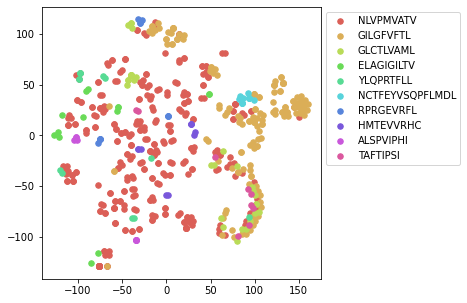

In [51]:
# The t-SNE dimension resuction result.
t_SNE_TCRs = TSNE(random_state=42)

# Do dimension resuction in TRA chain
# VDJ_test = Processed_TRA_by_GIANA
# TRA_epitope_label = VDJ_test['V6']
# TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
# TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V6'], "label":TRA_epitope_label_rep})
# TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')
# TRA_spec_label = TRA_spec_label.sort_values("label")
# display(TRA_spec_label)
TRA_spec_label, epitope = label_gen(Processed_TRA_by_GIANA)


TRA_t_SNE_fit= t_SNE_TCRs.fit_transform(Distance_Matrix_TRA_by_GIANA_array)
draw_scatter(epitope, TRA_t_SNE_fit, TRA_spec_label)
plt.savefig('Report material/TRA_t_SNE.png', facecolor='white', bbox_inches = Bbox([[0,0], [7,5]]))
plt.show()
plt.close()
#plt.scatter(TRA_t_SNE_fit[:,0], TRA_t_SNE_fit[:,1], c=TRA_epitope_label)

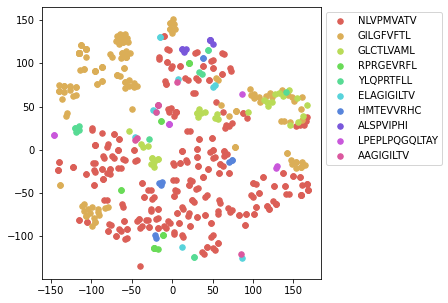

In [52]:
# The t-SNE dimension resuction result.
t_SNE_TCRs = TSNE(random_state=42, perplexity=20)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRB_by_GIANA
# TRB_epitope_label = VDJ_test['V5']
# TRB_epitope_label = pd.Categorical(TRB_epitope_label).codes
TRB_spec_label, epitope = label_gen(Processed_TRB_by_GIANA)

TRB_t_SNE_fit= t_SNE_TCRs.fit_transform(Distance_Matrix_TRB_by_GIANA_array)

draw_scatter(epitope, TRB_t_SNE_fit, TRB_spec_label)
plt.savefig('Report material/TRB_t_SNE.png', facecolor='white', bbox_inches = Bbox([[0,0], [7,5]]))
plt.show()
plt.close()
#plt.scatter(TRB_t_SNE_fit[:,0], TRB_t_SNE_fit[:,1], c=TRB_epitope_label)

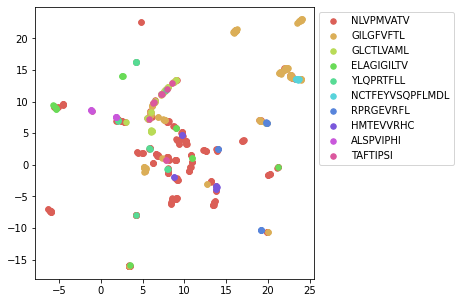

In [53]:
# The UMAP dimension resuction result.
umap_TCRs = umap.UMAP(random_state=42, n_components=2)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRA_by_GIANA
# TRA_epitope_label = VDJ_test['V5']
# TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
#print(TRA_epitope_label)
TRA_spec_label, epitope = label_gen(Processed_TRA_by_GIANA)

TRA_umap_fit = umap_TCRs.fit_transform(Distance_Matrix_TRA_by_GIANA_array)

draw_scatter(epitope, TRA_umap_fit, TRA_spec_label)
plt.savefig('Report material/TRA_UMAP.png', facecolor='white', bbox_inches = Bbox([[0,0], [7,5]]))
plt.show()
plt.close()
#plt.scatter(TRA_umap_fit[:,0], TRA_umap_fit[:,1], c=TRA_epitope_label)

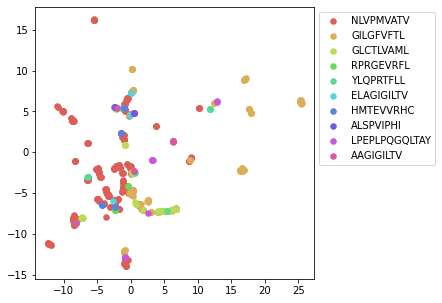

In [54]:
# The UMAP dimension resuction result.
umap_TCRs = umap.UMAP(random_state=42, n_components=2)

# Do dimension resuction in TRB chain
# VDJ_test = Processed_TRB_by_GIANA
# TRB_epitope_label = VDJ_test['V5']
# TRB_epitope_label = pd.Categorical(TRB_epitope_label).codes

TRB_spec_label, epitope = label_gen(Processed_TRB_by_GIANA)

TRB_umap_fit = umap_TCRs.fit_transform(Distance_Matrix_TRB_by_GIANA_array)

draw_scatter(epitope, TRB_umap_fit, TRB_spec_label)
plt.savefig('Report material/TRB_UMAP.png', facecolor='white', bbox_inches = Bbox([[0,0], [7,5]]))
plt.show()
plt.close()
#plt.scatter(TRB_umap_fit[:,0], TRB_umap_fit[:,1], c=TRB_epitope_label)

### Cluster

In [12]:
# To code the label species

TRA_epitope_label = Processed_TRA_by_GIANA['V6']
TRA_epitope_label_rep = pd.Categorical(TRA_epitope_label).codes

TRA_epitope_label = list(set(TRA_epitope_label_rep))
TRA_labels_len = len(TRA_epitope_label)


In [13]:
# TRA_epitope_label = Processed_TRA_by_GIANA['V5']
# TRA_epitope_label_rep = pd.Categorical(TRA_epitope_label).codes

# TRA_epitope_label = list(set(TRA_epitope_label_rep))
# TRA_labels_len = len(TRA_epitope_label)

In [14]:
# To code the label species
TRB_epitope_label = Processed_TRB_by_GIANA['V6']
TRB_epitope_label_rep = pd.Categorical(TRB_epitope_label).codes

TRB_epitope_label = list(set(TRB_epitope_label_rep))
TRB_labels_len = len(TRB_epitope_label)

In [15]:
# TRB_epitope_label = Processed_TRB_by_GIANA['V5']
# TRB_epitope_label_rep = pd.Categorical(TRB_epitope_label).codes

# TRB_epitope_label = list(set(TRB_epitope_label_rep))
# TRB_labels_len = len(TRB_epitope_label)

In [16]:
# To drop all repeat result and keep unique one
TRB_spec_label_rep = pd.DataFrame({"antitope":Processed_TRB_by_GIANA['V6'], "label":TRB_epitope_label_rep})
TRB_spec_label = TRB_spec_label_rep.drop_duplicates(keep='first')
display(TRB_spec_label)

TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V6'], "label":TRA_epitope_label_rep})
TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')
display(TRA_spec_label)

,antitope,label
0,FLKEKGGL,21
1,FLKEQGGL,23
2,FLKETGGL,24
3,FLKEMGGL,22
8,VGGNYNYLYRLFRKS,129
...,...,...
731,QLVHFVRDFAQL,91
759,MLAKALRKV,77
783,VMAPRTLIL,132
784,VMAPRTLVL,133


,antitope,label
0,NLVPMVATV,84
2,NPVVHFFKNIVTPR,88
3,RLLMLFAKDVVSRN,101
4,QLVHFVRDFAQL,93
9,IPLTEEAEL,49
...,...,...
731,KLVALVINAV,56
732,KLVALGINAV,55
745,GLCTLVAML,37
792,KLVAMGINAV,57


In [17]:
# TRB_spec_label_rep = pd.DataFrame({"antitope":Processed_TRB_by_GIANA['V5'], "label":TRB_epitope_label_rep})
# TRB_spec_label = TRB_spec_label_rep.drop_duplicates(keep='first')
# display(TRB_spec_label)

# TRA_spec_label_rep = pd.DataFrame({"antitope":Processed_TRA_by_GIANA['V5'], "label":TRA_epitope_label_rep})
# TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')

In [18]:
TRA_Kmeans_cluster= cluster.KMeans(n_clusters = TRA_labels_len, random_state = 42)
TRA_cluster_labels = TRA_Kmeans_cluster.fit_predict(TRA_umap_fit)
print(TRA_cluster_labels)

D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 66 137  74  74  74 119 119  82  82  29  29  29  24 128 148 148 140 140
  65 146  65  65  65 146  65  65  65  91 127  74  74  75  75   5   5  87
  87 111 111 123 113 110 110 122 122 122  97  97 132 132  33  33 121 121
 121  92  92  92  92  89  89  89   5   5  87  87 128 128  21  21  21 142
 142 133 133  21  21  21  21  84  84  84  84 104 104 146 146  68 115  68
  68  63  63  30  27  37  37  55  55  55  55 100  14  27 100 100  61  47
  85  42   7   7 107  88  61  21 142  25  25 123 124  49  49  43  43  26
  26  51  51  51  49  49  57  57  28 127   1   1  56  56  71  71  71  71
  71  71  87  87   4   4   4   4   4  30   4  30  30  30  30  30  30  30
  30  43  43  99  99 124 124 124 124 141 141 106 106 122 122  32  32  32
  32 142 142  63  63  84  84  28  28  28  40  40 125 125 125 112 112 141
  83  57  57 117 102   4   4  75  75  28  28  28  28  16  16  16  16 128
 128 120  81  93  93   0   0 107   0   0   0   0  63  63 100 100 106 106
  81 120 105 105 125  89 123 100 100 100  70  70  7

In [19]:
TRB_Kmeans_cluster= cluster.KMeans(n_clusters = TRB_labels_len, random_state = 42)
TRB_cluster_labels = TRB_Kmeans_cluster.fit_predict(TRB_umap_fit)
print(TRB_cluster_labels)

D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 67  67  67  67  23  23  23  23  99  99  62  62  62  62  62  62  62  62
  62  62  62  62  91  91  69  69  68  68 135 135  74  74  39  39  39  39
  39  39  39  39  39 136 136   5   5  88  88  88  71  71  74  58  48  48
  16  16  16  73  73   6   6  50  50  64  64  97  97  58 110 130  80  90
   4  84  84  27  27  28  28  28  29  29  50  50 116 116  27  27  27  84
  84  15  15   6   6   6 116 107  86  86   0   0  86  86  19  19   0   0
   0  17  17  79  79  79  79  79  79  28  28  28  28  28  28  28  28  28
  28  43  43  17  17 125 125 125 125  82  82  57  57 129 129  93  93 108
 108  41  41  18  18  18  97  97  97   9   9   9   9   9   9   9   9   9
   9  88  88  88  88  88  88  98  54 111  54 123  66  66 119  66 107  66
   4  66  10  10  10  71  71   4  90 105 105 105 105 105 107 107  55  55
  31  31  75  75  75  75  75 105   1  70   4  34  34 137 137  98  98  10
  10   1   1   1  16  16  70  70  70 106  90 131  78  78  78  78  36  31
  31  94  94  51  51   6   6  70  70  39   4 140 14

In [20]:
TRA_Kmeans_cluster_TSNE= cluster.KMeans(n_clusters = TRA_labels_len, random_state = 42)
TRA_cluster_labels_TSNE = TRA_Kmeans_cluster.fit_predict(TRA_t_SNE_fit)
print(TRA_cluster_labels_TSNE)

D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[139 139  97  97  97  11  11  73  73 135 135 135  47  47  16  16 144 150
  71  71  71  71  71  71  71  71  71  39  33  97  97  60  60 138 138 129
 129 102 102 124  65   2   2  34  34  34 150 150 128 128   6   6  47  47
  47  23  23  23  23   9   9   9 138 138 147 147  70  70   5   5   5 108
 108 125 125   5   5   5   5  96  96  96  96  14  14  14  14  86  65  65
  65  30  30 109  52  90  90  92  92  92  92 131 124  52  10  10  32  33
  67  79  39  39  12  76  32 108 108  41  41 124 142  42  42  59  59  16
  16  38  38  38  42  42 123 123  94  33  13  13  55  55 106 106 106 106
 106 106 147 147  37  37  37  37  37   3  37   3   3   3   3   3   3   3
   3  59  59 143 143  95  95  95  95  21  21 105 105  34  34 115 115 115
 115 141 141  30  30  96  96  94  94  94  45  45   9   9   9  74  74  21
  21 123 123  78  78  37  37  60  60  94  94  94  94  10  10  10  10  47
  47 125 114  84  84  27  27  12  27  27  27  27  30  30  10  10 105 105
 114 114 127 127   9   9 124 131 131 131 132 132 13

In [21]:
TRB_Kmeans_cluster_TSNE= cluster.KMeans(n_clusters = TRB_labels_len, random_state = 42)
TRB_cluster_labels_TSNE = TRB_Kmeans_cluster.fit_predict(TRB_t_SNE_fit)
print(TRB_cluster_labels_TSNE)

D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 90  90  90  90  98  98  98  98 110 110  14  14  14  14  14  14  14  14
  14  14  14  14  67  67  42  42 135 135  36  36  31  31  74  74  74  74
  74  74  74  74  74  23  41  93  93  59  59  59  41  41   1  62  75  75
  42  42  42  51  51 123 123 104 104  84  84  87  87  62  29  64  64 101
   7  59  59  56  56  48  48  48 106 106 104 104  64  64  54  54  54 106
 106  50  50  15  15  15  64  21   6   6   6 133   6   6 102 102   6   6
   6 111 111  45  45  45  45  45  45  48  48  48  48  48  48  48  48  48
  48  22  22 111 111  78  78  78  78  36  36   1   1 124 124  26  26 109
 109  72  72 139 139 139  23  87  41  56 113 113 113 113 113  56 113 113
 113  88  88  88  88  88  88  53 140 120 108 114  30  30 114  30  21  30
  43  30  89  89  89  23  23  43 138  60  60  60  60  60  21  21   8   8
  85  85 117 117 117 117 117  71  71 134  43  51  51  33  33 119 119  89
  89  71  71  71  42  42  76  76  76  53 140  53  19  19  19  19  52 107
 107 111 111   2   2  15  15  76  76  21   7   2   

In [22]:
from pynndescent.utils import seed
import randomcolor
import random

random.seed(10)
color_TRA = {}
for c in set(TRA_cluster_labels):
    color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

color_TRB = {}
for c in set(TRB_cluster_labels):
    color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

for c in set(TRA_cluster_labels_TSNE):
    color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

color_TRB = {}
for c in set(TRB_cluster_labels_TSNE):
    color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]


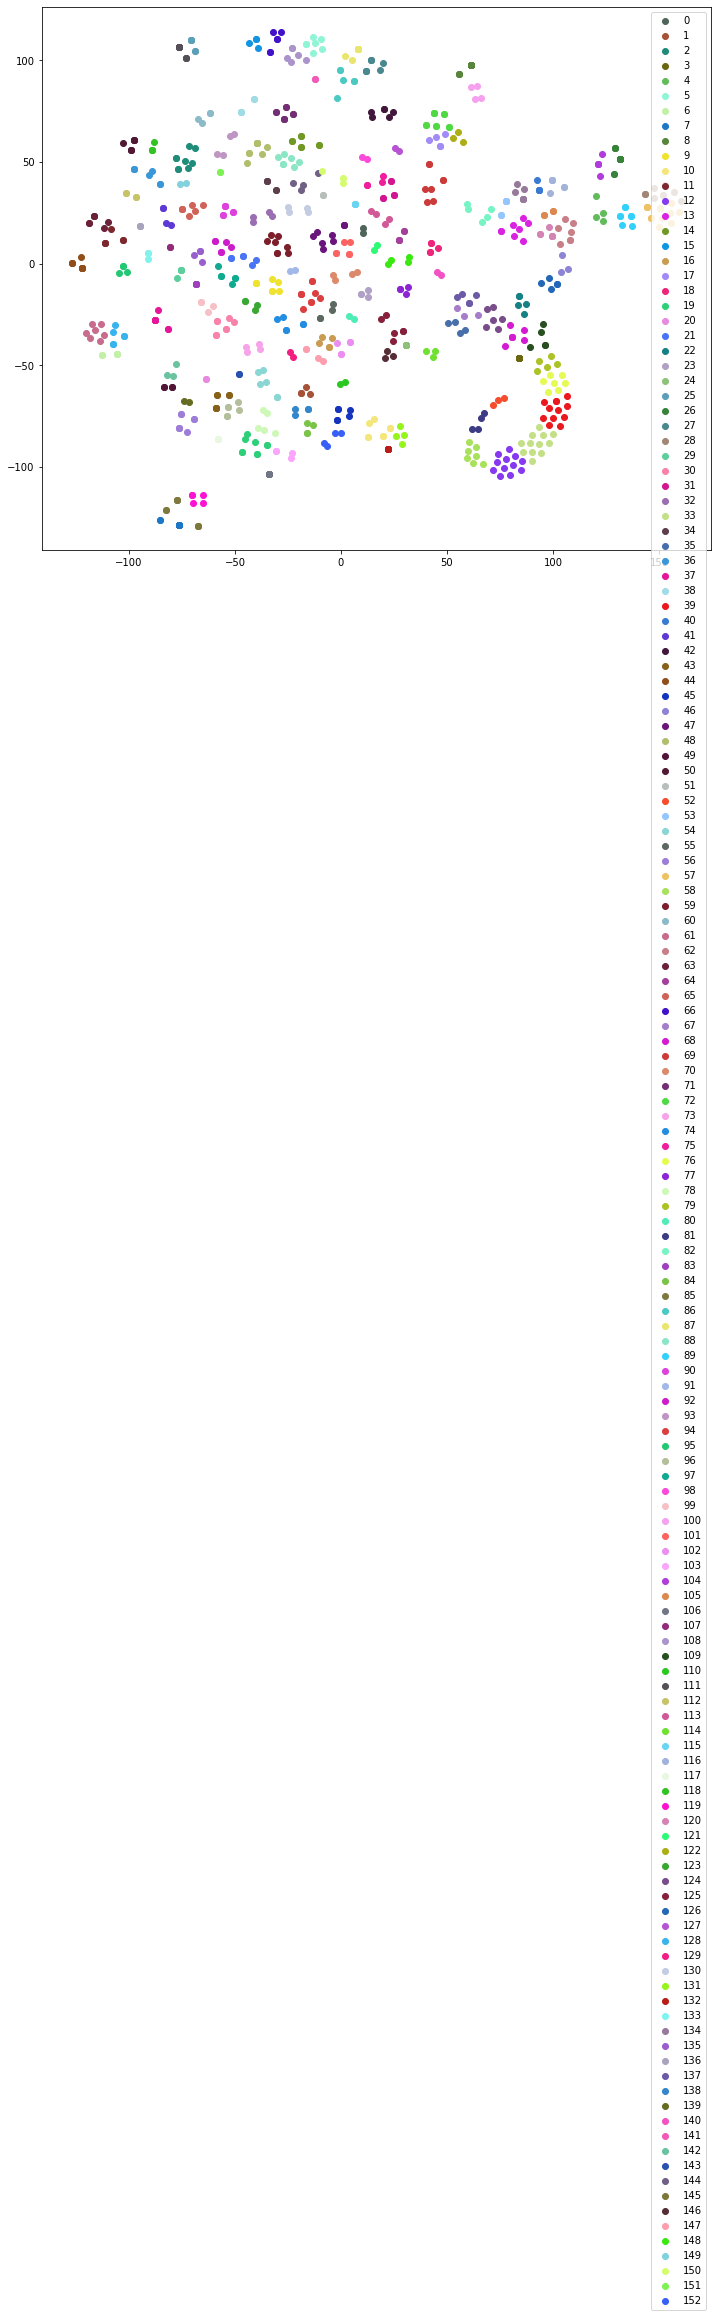

In [23]:
plt.figure(figsize=(12,10))
for label in set(TRA_cluster_labels_TSNE):
    plt.scatter(TRA_t_SNE_fit[TRA_cluster_labels_TSNE == label ,0], 
              TRA_t_SNE_fit[TRA_cluster_labels_TSNE == label,1], c=color_TRA[label], label=label)
plt.legend()
plt.show()

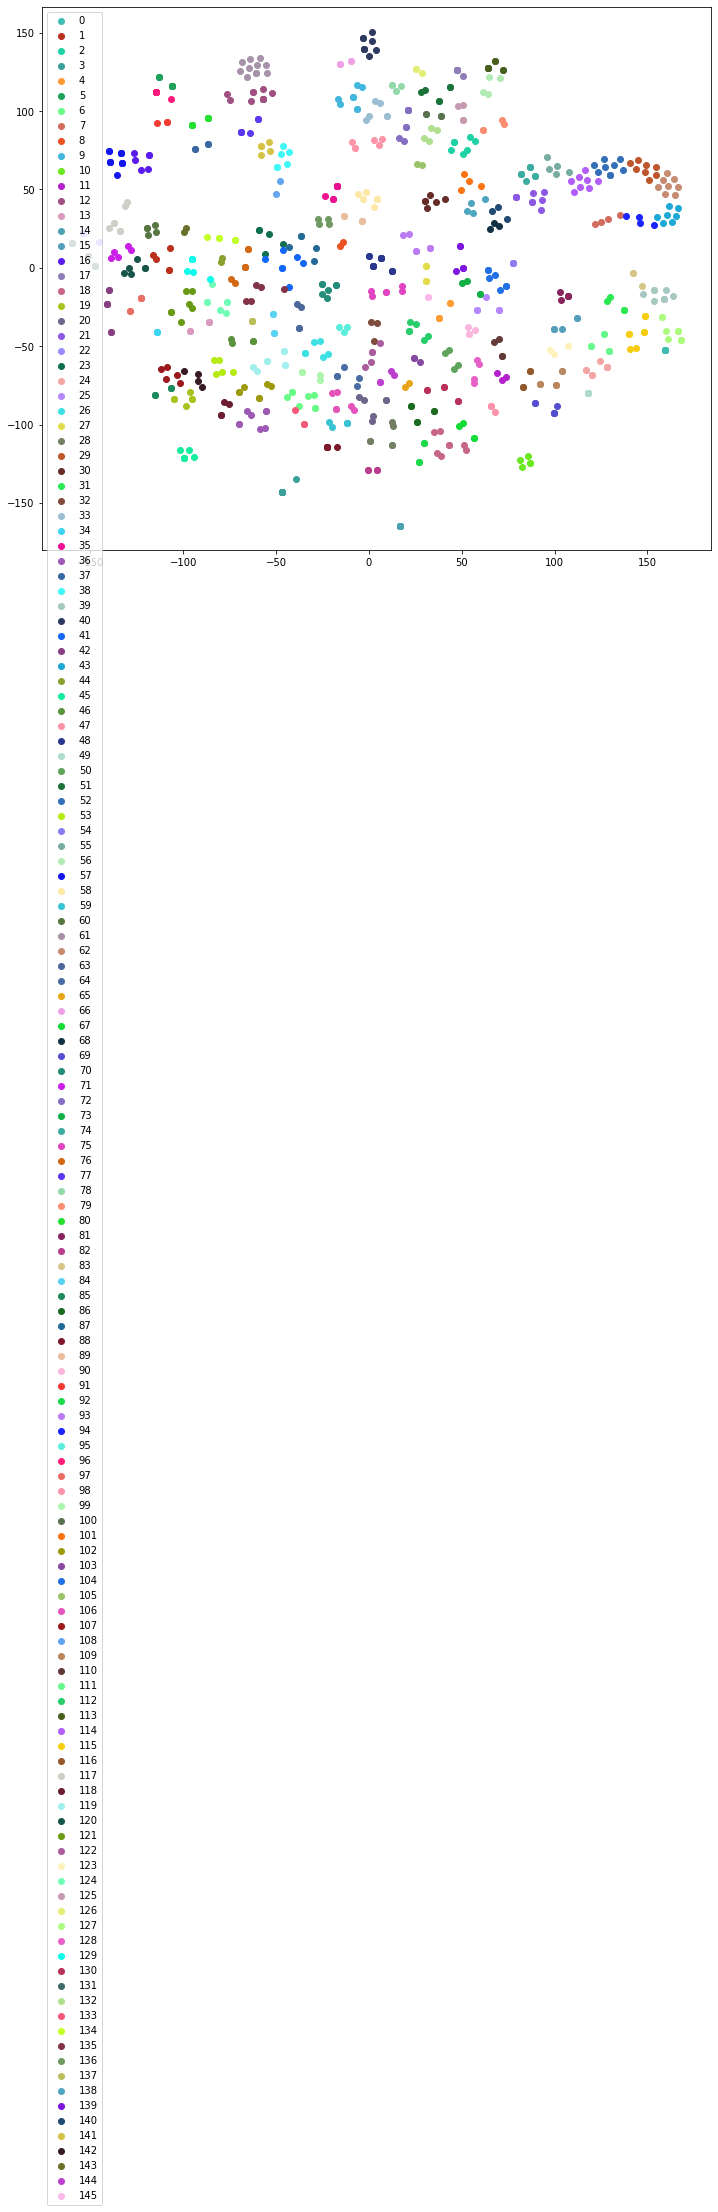

In [24]:
plt.figure(figsize=(12,10))
for label in set(TRB_cluster_labels_TSNE):
    plt.scatter(TRB_t_SNE_fit[TRB_cluster_labels_TSNE == label ,0], 
              TRB_t_SNE_fit[TRB_cluster_labels_TSNE == label,1], c=color_TRB[label], label=label)
plt.legend()
plt.show()

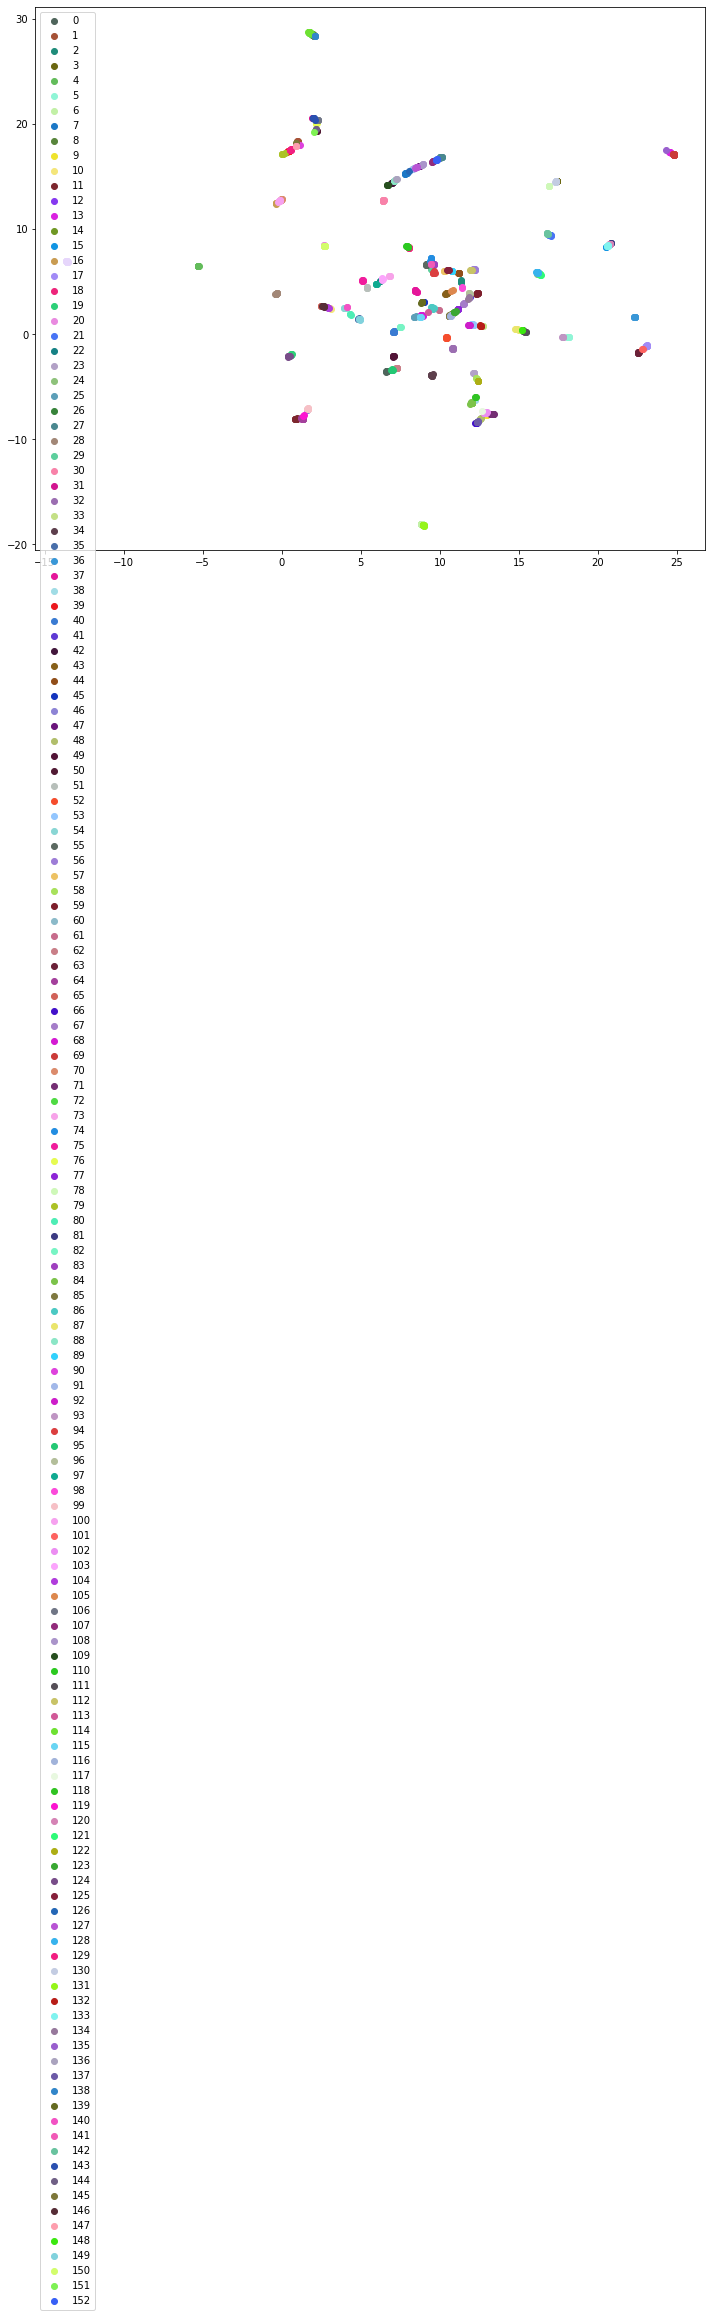

In [25]:
plt.figure(figsize=(12,10))
for label in set(TRA_cluster_labels):
    plt.scatter(TRA_umap_fit[TRA_cluster_labels == label ,0], 
              TRA_umap_fit[TRA_cluster_labels == label,1], c=color_TRA[label], label=label)
plt.legend()
plt.show()

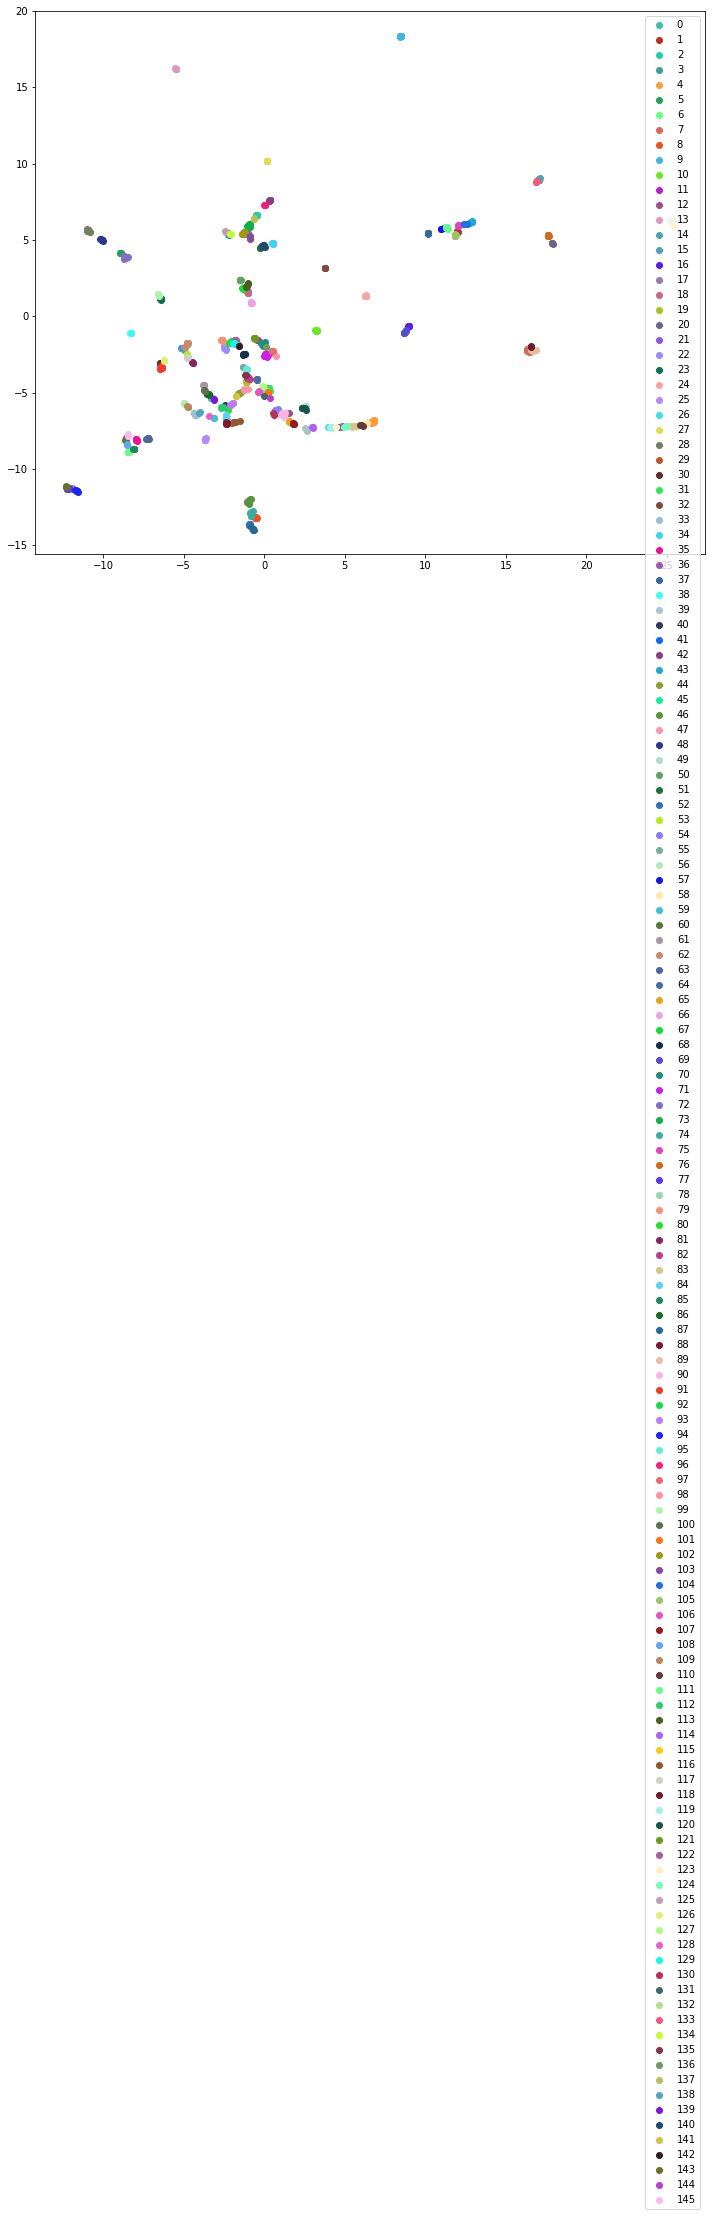

In [26]:
plt.figure(figsize=(12,10))
for label in set(TRB_cluster_labels):
    plt.scatter(TRB_umap_fit[TRB_cluster_labels == label ,0], 
              TRB_umap_fit[TRB_cluster_labels == label,1], c=color_TRB[label], label=label)
plt.legend()
plt.show()

In [27]:
# To print what labels contain in each cluster
def purity_compute(labels, spec_label_rep):
    Cluster_dic_tra_purity = []
    for l in set(labels):
        label_index = np.where(labels == l)
        if label_index != None:
            label_index = np.array(label_index).flatten()
            #print(label_index)
            TRA_label_repeat = spec_label_rep.iloc[label_index,:]
            TRA_label_repeat = TRA_label_repeat["antitope"]
            count = dict(Counter(TRA_label_repeat))
            count_values = count.values()
            purity = max(count_values)/sum(count_values)
            Cluster_dic_tra_purity.append(purity)
            # print(count)
    print(np.average(Cluster_dic_tra_purity))
    return np.average(Cluster_dic_tra_purity)

print("TRA_UMAP: \n")
TRA_UMAP_Purity = purity_compute(TRA_cluster_labels, TRA_spec_label_rep)    
print("TRB_UMAP: \n")
TRB_UMAP_Purity = purity_compute(TRB_cluster_labels, TRB_spec_label_rep)    

print("TRA_TSNE: \n")
TRA_TSNE_Purity = purity_compute(TRA_cluster_labels_TSNE, TRA_spec_label_rep)
print("TRB_TSNE: \n")
TRB_TSNE_Purity = purity_compute(TRB_cluster_labels_TSNE, TRB_spec_label_rep)




#                 Cluster_dic_purity = []
#                 # print("TRA_UMAP: \n")
#                 for l in set(TRA_cluster_labels):
#                     label_index = np.where(TRA_cluster_labels == l)
#                     label_index = np.array(label_index).flatten()
#                     #print(label_index)
#                     TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
#                     TRA_label_repeat = TRA_label_repeat["antitope"]
#                     count = dict(Counter(TRA_label_repeat))
#                     count_values = count.values()
#                     purity = max(count_values)/sum(count_values)
#                     Cluster_dic_purity.append(purity)
#                 #     print(count)
#                 print(np.average(Cluster_dic_purity))

# Cluster_dic_purity = []
# print("TRB_UMAP: \n")
# for l in set(TRB_cluster_labels):
#     label_index = np.where(TRB_cluster_labels == l)
#     label_index = np.array(label_index).flatten()
#     #print(label_index)
#     TRB_label_repeat = TRB_spec_label_rep.loc[label_index,:]
#     TRB_label_repeat = TRB_label_repeat["antitope"]
#     count = dict(Counter(TRB_label_repeat))
#     count_values = count.values()
#     purity = max(count_values)/sum(count_values)
#     Cluster_dic_purity.append(purity)
# #     print(count)
# print(np.average(Cluster_dic_purity))
    
# Cluster_dic_purity = []
# print("TRA_TSNE: \n")
# for l in set(TRA_cluster_labels_TSNE):
#     label_index = np.where(TRA_cluster_labels_TSNE == l)
#     label_index = np.array(label_index).flatten()
#     #print(label_index)
#     TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
#     TRA_label_repeat = TRA_label_repeat["antitope"]
#     count = dict(Counter(TRA_label_repeat))
#     count_values = count.values()
#     purity = max(count_values)/sum(count_values)
#     Cluster_dic_purity.append(purity)
# #     print(count)
# print(np.average(Cluster_dic_purity))
    
# Cluster_dic_purity = []
# print("TRB_TSNE: \n")
# for l in set(TRB_cluster_labels_TSNE):
#     label_index = np.where(TRB_cluster_labels_TSNE == l)
#     label_index = np.array(label_index).flatten()
#     #print(label_index)
#     TRB_label_repeat = TRB_spec_label_rep.loc[label_index,:]
#     TRB_label_repeat = TRB_label_repeat["antitope"]
#     count = dict(Counter(TRB_label_repeat))
#     count_values = count.values()
#     purity = max(count_values)/sum(count_values)
#     Cluster_dic_purity.append(purity)    
# #     print(count)
# print(np.average(Cluster_dic_purity))

TRA_UMAP: 

0.6898082309847016
TRB_UMAP: 

0.7327857644638466
TRA_TSNE: 

0.7225978451468646
TRB_TSNE: 

0.7031434509174235


In [29]:
TSNE_purity = [TRA_TSNE_Purity, TRB_TSNE_Purity]
UMAP_purity = [TRA_UMAP_Purity, TRB_UMAP_Purity]
purity_df = pd.DataFrame([TSNE_purity, UMAP_purity])
purity_df.columns = ['TRA', 'TRB']
purity_df.index = ['t-SNE', 'UMAP']
display(purity_df)

,TRA,TRB
t-SNE,0.722598,0.703143
UMAP,0.689808,0.732786


In [30]:
purity_df.to_latex("Report Material/GIANA_cluster_purity.tex")